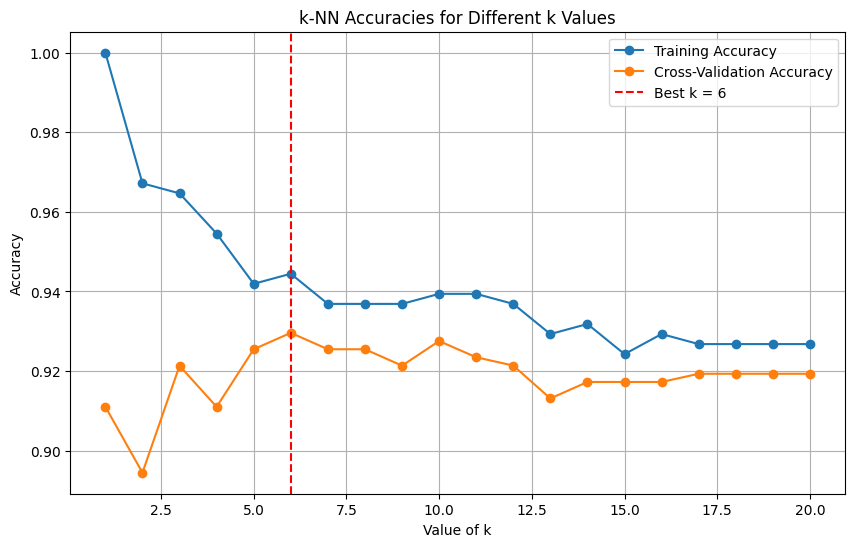

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into final test set and remaining data (70/15/15 split)
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.18, random_state=42)

cv_scores = []
train_scores = []
val_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def calculate_accuracy(y_true, y_pred):
    """Calculate accuracy given true and predicted labels."""
    return np.mean(y_true == y_pred)

# Loop for different k values and capture CV, train, and val scores
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    fold_scores = []
    
    for train_idx, cv_idx in kf.split(X_remain, y_remain):
        X_kf_train, X_kf_cv = X_remain[train_idx], X_remain[cv_idx]
        y_kf_train, y_kf_cv = y_remain[train_idx], y_remain[cv_idx]
        
        knn.fit(X_kf_train, y_kf_train)
        y_pred_cv = knn.predict(X_kf_cv)
        fold_scores.append(calculate_accuracy(y_kf_cv, y_pred_cv))
    
    # Average cross-validation score
    cv_scores.append(np.mean(fold_scores))
    
    # Training the model on the entire training set for training accuracy
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_scores.append(calculate_accuracy(y_train, y_train_pred))
    
 
# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), cv_scores, label='Cross-Validation Accuracy', marker='o')

# Highlighting the best k value from CV
best_k = np.argmax(cv_scores) + 1
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')

plt.title('k-NN Accuracies for Different k Values')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Test accuracy using the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_remain, y_remain)
y_test_pred = best_knn.predict(X_test)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test accuracy with best k ({best_k}): {test_accuracy:.4f}")

Test accuracy with best k (6): 0.9419


## Determining the best K Value

1. **Visualization of Error Rate:**

    * Split the dataset into training and testing sets.
    * For a range of `k` values, apply the KNN algorithm and compute the error rate on the validation set.
    * Plot the error rates against the `k` values. Often, as `k` increases, the error rate will first decrease until a point where it stabilizes, and then it might start increasing. The `k` value corresponding to the lowest error rate can be considered optimal.

2. **Cross-Validation:**
    * K-fold cross-validation can be used to determine the optimal `k`.
    * For each `k` value:
        * Split the training dataset into `k` equal parts.
        * For each part: use it as a validation set and the remaining `k-1` parts as training data.
        * Average the results from the `k` experiments for a final performance metric.
    * The `k` value which gives the best average validation performance is chosen.

3. **Bias-Variance Tradeoff:**
    
    * A small value for `k` (like `k=1`) will have low bias but high variance. It might capture noise and outliers, potentially leading to overfitting.
    * A large `k` will have smoother decision boundaries, which mean higher bias but lower variance. It might be too general, potentially leading to underfitting.
    * Understanding this tradeoff can help in choosing a `k` that strikes a balance between overfitting and underfitting.

4. **Domain Knowledge:**

    * Sometimes, domain-specific information might suggest an appropriate `k` value. For example, in medical diagnosis, considering the 3 nearest scans might make more sense than considering 50.